<a href="https://colab.research.google.com/github/TinozgDominic/AI2022/blob/main/MLP/MLP_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [101]:
from keras.datasets import cifar10

In [102]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f'Input shape: {x_train[0].shape}')
print(f'Output shape: {y_train[0].shape}')
print(f'Train size: {len(x_train)}')
print(f'Test size: {len(x_test)}')

Input shape: (32, 32, 3)
Output shape: (1,)
Train size: 50000
Test size: 10000


In [103]:
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)

print(f'Input shape: {x_train[0].shape}')

Input shape: (32, 32, 1)


In [104]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [105]:
print(f'Output shape: {y_train[0].shape}')

Output shape: (10,)


In [106]:
model = models.Sequential()

model.add(Flatten(input_shape = [32,32,1]))
model.add(layers.Dense(500, activation = 'relu'))
model.add(layers.Dense(300, activation = 'relu'))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 dense_23 (Dense)            (None, 500)               512500    
                                                                 
 dense_24 (Dense)            (None, 300)               150300    
                                                                 
 dense_25 (Dense)            (None, 100)               30100     
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
Total params: 693,910
Trainable params: 693,910
Non-trainable params: 0
_________________________________________________________________


In [107]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback

callbacks = [Callback(), 
            EarlyStopping(patience=21, verbose=1),
            ReduceLROnPlateau(patience=5, verbose=1),
            ModelCheckpoint('MLP_Cifar10.h5', verbose=1, save_best_only=True)]

In [150]:
model.fit(x_train, y_train, epochs = 100, batch_size = 500,validation_data=(x_test, y_test), callbacks = callbacks)

Epoch 1/100
 99/100 [============================>.] - ETA: 0s - loss: 1.5459 - accuracy: 0.4613
Epoch 1: val_loss did not improve from 1.76921
100/100 [==============================] - 4s 43ms/step - loss: 1.5454 - accuracy: 0.4613 - val_loss: 1.7709 - val_accuracy: 0.3796 - lr: 1.0000e-08
Epoch 2/100
 99/100 [============================>.] - ETA: 0s - loss: 1.5453 - accuracy: 0.4609
Epoch 2: val_loss did not improve from 1.76921
100/100 [==============================] - 4s 43ms/step - loss: 1.5454 - accuracy: 0.4613 - val_loss: 1.7709 - val_accuracy: 0.3796 - lr: 1.0000e-08
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 1.5448 - accuracy: 0.4613
Epoch 3: val_loss did not improve from 1.76921
100/100 [==============================] - 4s 43ms/step - loss: 1.5454 - accuracy: 0.4613 - val_loss: 1.7709 - val_accuracy: 0.3795 - lr: 1.0000e-08
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 1.5454 - accuracy: 0.4613
Epoch 4: val_loss did no

In [151]:
classes = ('plane', 'car', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

1/1 [==============================] - 0s 17ms/step
Predict: frog
True mask: frog


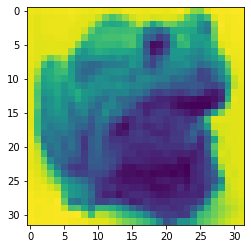

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import random

show = random.randint(0,9999)

print('Predict:',classes[np.argmax(model.predict(x_test[show]))])
print('True mask:',classes[np.argmax(y_test[show])])

plt.imshow(tf.reshape(x_test[show],[32,32]))
plt.show()